# Probability, Sampling, and Empirical Distributions

In the previous chapter we discussed different types of experiments and how sampling can be used to make inferences about a population. However, it is often difficult or expensive to conduct experiments or even to find observational data on certain phenomena. In these cases, scientists often *simulate* data instead. We saw a few examples of simulation and inference previously. In this chapter we will build on the concepts of randomness and sampling that we have learned to investiate empirical distributions, inference, and the usefulness of simulating real-world data.

## Sampling

We have discussed methods of sampling individuals from a population and how biased samples can affect the generalizability of our data. We have also seen how to slice dataframes or select elelments from arrays. This is another type of sampling known as *deterministic sampling* since there is no chance involved. In this section, we will build on our use of the ``sample`` and ``random.choice`` functions from Chapter 9 to create *probabalistic samples* where the probability of each unit being chosen is known *before* sampling is done. Simple random samples (SRS), as we learned in the previous chapter, are samples in which each unit has equal probability of being chosen (1/N where N is the sample space being chosen from). Since we know the probability of each unit being chosen, a SRS is an example of a probabilistic sample. Sampling is used to make inferences about a population when gathering information about the entire population is difficult or impossible. We make these inferences through calculating statistics on our sample with the goal of using the statistic to estimate the true population parameter we are interested in studying. Therefore, it is important for us to understand how much uncertainty is present in our statistical estimate. Quantifying and understanding this uncertainty is much easier mathematically when samples are probabilistic as we can use laws of probability. 

The amount that the value of a statistic varies based on different samples is known as *sampling variability*. When we look at all possible values a statistic could take over all possible samples of the same size taken from the same population, we are building a *probability distribution* or *sampling distribution* of that statistic. As a probability distribution depicts all possible samples of the same size from a population, it is not based on observed data. However, we can estimate a probability distribution *empirically* by taking many samples from a population and plotting the distribution of the *observed* values of a statistic. This is known as an *empirical distribution*.

Let's return to our dice rolling example from Chapter 9. This is an example of a probabilitic sample as the chance of each face landing upright is 1/6 and we know this before rolling the die. Therefore, our probability distribution is uniform. As we roll more dice and plot the restults, we see the empirical distribution (our observed distribution of dice rolls) get closer to the probability distribution, looking more uniform.

(array([1715., 1664., 1599., 1723., 1654., 1645.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

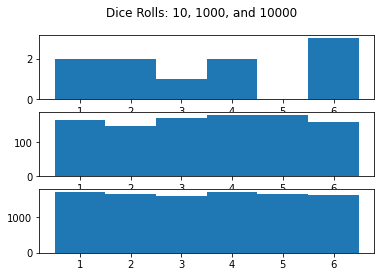

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

die = pd.DataFrame(
    {
        'Face': np.arange(1, 7),
    }
)
roll_bins = np.arange(0.5, 7, 1)
fig, axs = plt.subplots(3)
fig.suptitle('Dice Rolls: 10, 1000, and 10000')
axs[0].hist(die.sample(10, replace=True),bins=roll_bins)
axs[1].hist(die.sample(1000, replace=True),bins=roll_bins)
axs[2].hist(die.sample(10000, replace=True),bins=roll_bins)

## Simulation

Now, suppose I am not interested in each roll but in the average value of all the dice rolls of students in my classroom. I have 50 students present and each student rolls 1 die. I then take the mean of all 50 dice rolls. What is the probability distribution for the average dice roll? This question can be easily answered through simulation! Simulations use a computer to mimic real experiments. Instead of asking all of my students to roll dice and take the mean 100s or 1000s of times to plot an empirical distribution, which would be both noisy and time consuming, I can have the computer do it for us. First, we can write code that does this experiment one time. We use `sample` to roll our die and `np.mean` to take the average. 

In [15]:
np.mean(die.sample(50, replace=True))

Face    3.92
dtype: float64

This value is a statistic, and we know that statistics have sampling variability so we want to see the empirical distribution for our statistic. We can do this by running the experiment many times and recording the results. 

REPLACE WITH REAL DATA EXAMPLE?

In [16]:
def face_mean_sim(nsim):
    """Simulates nsim repetions of 50 dice rolls and returns their sample mean."""
    means = np.array([])
    for i in np.arange(nsim):
        means = np.append(means, np.mean(die.sample(50, replace=True)))
    return means

(array([  19.,  164.,  710., 1824., 2761., 2380., 1532.,  497.,  104.,
           9.]),
 array([2.64 , 2.816, 2.992, 3.168, 3.344, 3.52 , 3.696, 3.872, 4.048,
        4.224, 4.4  ]),
 <BarContainer object of 10 artists>)

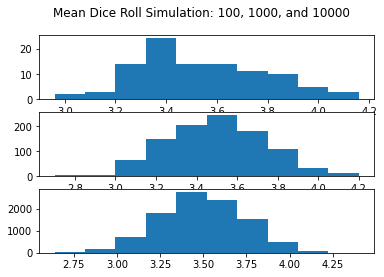

In [17]:
fig, axs = plt.subplots(3)
fig.suptitle('Mean Dice Roll Simulation: 100, 1000, and 10000')
axs[0].hist(face_mean_sim(100))
axs[1].hist(face_mean_sim(1000))
axs[2].hist(face_mean_sim(10000))

Based on our empirical distribution, we can see that the average value of the dice rolls is approximately normally distributed (bell-shaped) with a mean of around 3.5. We can use our simulated data to calculate the mean and standard deviation of our distribution, and we can check this work mathematically as well. However, doing so involves calculus and is beyond the scope of this course. Therefore, we are able to use simulation to study what would be a difficult or intractible mathematical problem. 
(Central Limit Theorem here???)

## Bias-Variance Tradeoff

There is something else that is clear from these histograms. As the number of simulations increases, the bell curve has less spread or *variability*. In general, as sample size increases, variance decreases. We can calculate the mean and variance of our statistic using the empirical distribution we simulated. Statistics with mean equal to the true value of the parameter being estimated are known as *unbiased estimators*. The *bias* of the estimator is the amount the estimator deviates from the true parameter. The figure below shows how bias and variance affect estimation. 

```{figure} ./bias-variance.png
---
align: center
---
Bias-Variance Tradeoff Illustration
```

Assuming the true value is the bullseye on the target, you want your estimates to hit that bullseye reliably. This means you want both low bias and low variance. However, this is often a difficult problem, especially in machine learning, due to a concept known as the *bias-variance tradeoff*. This phenomenon will be discuseed further in later Chapters when we discuss machine learning and generalizability error. For now, it is important to understand how bias and variance affect the accuracy of estimates.